In [4]:
# real in time using of style transfer model
# with the help of the video below
# https://www.youtube.com/watch?v=LWlbFVtPiwo&ab_channel=CODEMENTAL

import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2


In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


Metal device set to: Apple M1


2023-02-22 00:03:59.110847: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-22 00:03:59.111063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


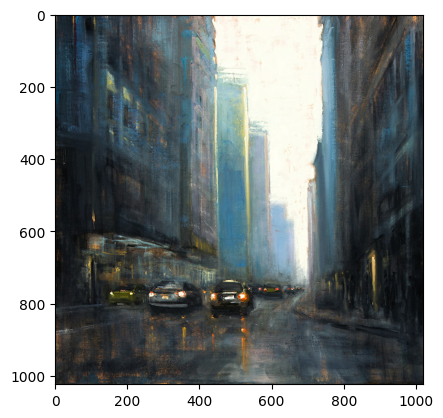

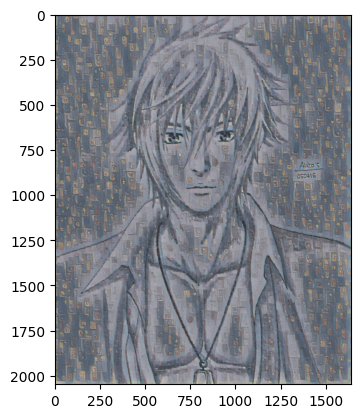

In [19]:
#this part is taken from the Nicholas Renotte tutorial code
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img    

content_image = load_image('Anime')
style_image = load_image('Anime.jpeg')
content_image.shape

plt.imshow(np.squeeze(style_image))
plt.show()

stylized_image = model(tf.constant(content_image), tf.constant(style_image))
plt.imshow(np.squeeze(stylized_image[0]))
plt.show()

In [20]:


def crop_center(image):
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    image = tf.image.central_crop(image, central_fraction=new_shape/shape[1])
    return image

def resize_image_to_square(image_np, image_size=(256,256), preserve_aspect_ratio=True):
    image_np_extra = image_np.astype(np.float32)[np.newaxis, ...]
    if image_np_extra.max() > 1.0:
        image_np_extra = image_np_extra / 255.
    if len(image_np_extra.shape) == 3:
        image_np_extra = tf.stack([image_np_extra, image_np_extra, image_np_extra], axis=-1)
    image_np_extra = crop_center(image_np_extra)
    image_np_extra = tf.image.resize(image_np_extra, image_size, preserve_aspect_ratio=True)
    return image_np_extra


In [22]:
import cv2

frame_size=500
cap = cv2.VideoCapture(0)
while True:
    flag,frame=cap.read()
    if flag:
        image_rgb_np = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(image_rgb_np)
        resized_image_np = resize_image_to_square(image_rgb_np, image_size=(frame_size,frame_size))
        
        outputs = model(tf.constant(resized_image_np), tf.constant(style_image))
        
        stylized_image = outputs[0]
        image_pil = tf.keras.preprocessing.image.array_to_img(stylized_image[0])
        
        image_bgr_np=cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
        cv2.imshow("style transfer", image_bgr_np)
    else:
        print("Something went wrong")
        break
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[[ 9  2  0]
  [ 7  1  0]
  [13  7  4]
  ...
  [10  6  5]
  [ 8  4  2]
  [10  6  5]]

 [[ 6  0  0]
  [16  9  6]
  [16  9  6]
  ...
  [ 8  4  2]
  [ 7  3  1]
  [ 9  5  3]]

 [[13  7  4]
  [19 13 10]
  [14  8  5]
  ...
  [ 3  0  0]
  [ 8  4  2]
  [ 7  3  1]]

 ...

 [[ 4  2  0]
  [ 6  4  2]
  [ 4  2  0]
  ...
  [ 6  4  2]
  [ 4  2  0]
  [ 3  1  0]]

 [[ 7  6  3]
  [ 5  3  1]
  [ 5  3  1]
  ...
  [ 9  7  5]
  [ 7  6  3]
  [ 3  1  0]]

 [[10  8  6]
  [10  8  6]
  [ 3  1  0]
  ...
  [12 10  8]
  [ 7  6  3]
  [ 4  2  0]]]
[[[176 150 106]
  [173 148 102]
  [177 152 105]
  ...
  [153 138 103]
  [163 148 113]
  [176 161 126]]

 [[180 155 111]
  [173 148 102]
  [176 151 104]
  ...
  [153 138 103]
  [162 147 112]
  [177 162 127]]

 [[177 152 107]
  [177 152 107]
  [176 150 106]
  ...
  [154 139 104]
  [163 148 115]
  [179 165 131]]

 ...

 [[137 120  83]
  [128 111  76]
  [121 102  70]
  ...
  [132 132 109]
  [131 129 105]
  [124 122  98]]

 [[137 120  81]
  [126 110  72]
  [119  99  67]
  ...
  

[[[168 146  96]
  [163 141  91]
  [170 148  98]
  ...
  [165 149 105]
  [177 160 116]
  [186 170 126]]

 [[169 147  97]
  [168 146  96]
  [170 148  98]
  ...
  [165 149 105]
  [175 159 115]
  [190 174 130]]

 [[171 149  99]
  [173 150 101]
  [169 147  97]
  ...
  [166 150 106]
  [178 161 119]
  [190 174 132]]

 ...

 [[117 102  66]
  [107  93  57]
  [103  86  53]
  ...
  [155 153 126]
  [150 144 116]
  [145 139 111]]

 [[119 104  69]
  [110  95  59]
  [103  86  53]
  ...
  [155 151 125]
  [151 142 114]
  [145 136 109]]

 [[120 105  70]
  [110  95  59]
  [103  86  53]
  ...
  [156 152 126]
  [152 143 116]
  [146 138 110]]]
[[[170 145  98]
  [167 142  96]
  [166 141  95]
  ...
  [166 147 103]
  [177 160 116]
  [190 174 130]]

 [[170 145  98]
  [167 142  96]
  [167 142  96]
  ...
  [164 148 103]
  [176 162 117]
  [190 176 131]]

 [[169 144  97]
  [170 145  98]
  [170 145  98]
  ...
  [165 149 105]
  [177 163 119]
  [189 175 130]]

 ...

 [[117  97  67]
  [107  88  58]
  [101  82  54]
  ..

[[[175 148 104]
  [164 139  94]
  [165 140  95]
  ...
  [163 146 102]
  [174 160 115]
  [182 168 123]]

 [[175 148 104]
  [171 146 101]
  [172 147 102]
  ...
  [160 144 100]
  [174 160 115]
  [185 171 127]]

 [[169 141 100]
  [169 143 101]
  [171 146 103]
  ...
  [157 141  96]
  [174 160 115]
  [190 176 131]]

 ...

 [[115 100  69]
  [107  92  61]
  [101  83  53]
  ...
  [160 156 131]
  [156 150 124]
  [147 140 114]]

 [[115 100  69]
  [106  91  60]
  [101  83  55]
  ...
  [161 157 133]
  [158 152 126]
  [148 141 115]]

 [[115 100  69]
  [104  89  58]
  [ 99  81  53]
  ...
  [162 158 134]
  [159 153 127]
  [150 144 118]]]
[[[165 145  95]
  [160 140  90]
  [164 144  94]
  ...
  [163 145 103]
  [178 161 119]
  [193 177 135]]

 [[165 145  95]
  [165 145  95]
  [166 146  96]
  ...
  [159 140  99]
  [175 159 117]
  [189 173 131]]

 [[168 146  96]
  [171 151 101]
  [168 148  98]
  ...
  [157 139  97]
  [172 154 115]
  [198 179 140]]

 ...

 [[109  92  55]
  [103  86  49]
  [107  88  52]
  ..

[[[170 144 102]
  [166 143 100]
  [169 146 103]
  ...
  [155 141 101]
  [170 160 119]
  [189 179 138]]

 [[171 146 103]
  [166 143 100]
  [169 146 103]
  ...
  [154 140  99]
  [170 160 119]
  [187 178 137]]

 [[169 143 101]
  [169 146 103]
  [173 150 107]
  ...
  [156 142 102]
  [169 159 120]
  [185 175 137]]

 ...

 [[112  95  67]
  [107  89  61]
  [104  84  56]
  ...
  [159 158 126]
  [156 150 119]
  [148 142 111]]

 [[114  96  68]
  [107  89  61]
  [104  84  56]
  ...
  [159 155 124]
  [156 150 119]
  [148 142 111]]

 [[116  98  70]
  [108  90  62]
  [103  83  55]
  ...
  [159 155 124]
  [154 148 117]
  [151 145 115]]]
[[[169 146 101]
  [167 144  99]
  [170 147 102]
  ...
  [163 146 104]
  [171 157 115]
  [178 164 122]]

 [[171 149 104]
  [169 146 101]
  [169 146 101]
  ...
  [163 146 104]
  [171 157 115]
  [179 165 123]]

 [[170 147 102]
  [169 146 101]
  [168 145 100]
  ...
  [166 150 108]
  [172 158 116]
  [182 168 125]]

 ...

 [[114  96  66]
  [106  88  58]
  [104  84  54]
  ..

In [21]:
import cv2

frame_size = 255

# Open the video file
cap = cv2.VideoCapture('/Users/kamyartavakoli/Desktop/66daysofmlops/day1/mlops-zoomcamp/training/Computer Vision/video.avi')

# Loop through the video frames
while cap.isOpened():
    # Read the next frame
    flag, frame = cap.read()
    
    if flag:
        image_rgb_np = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        print(image_rgb_np)
        resized_image_np = resize_image_to_square(image_rgb_np, image_size=(frame_size,frame_size))
        
        outputs = model(tf.constant(resized_image_np), tf.constant(style_image))
        
        stylized_image = outputs[0]
        image_pil = tf.keras.preprocessing.image.array_to_img(stylized_image[0])
        
        image_bgr_np=cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
        cv2.imshow("style transfer", image_bgr_np)
    else:
        print("End of video")
        break
    
    # Wait for a key press and exit if 'q' is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video file and destroy the window
cap.release()
cv2.destroyAllWindows()

[[[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[141 118  55]
  [141 118  55]
  [141 118  55]
  ...
  [108  67  15]
  [107  66  13]
  [111  70  18]]

 [[143 119  56]
  [143 119  56]
  [143 119  56]
  ...
  [108  67  15]
  [108  67  15]
  [111  70  18]]

 [[144 120  58]
  [144 120  58]
  [144 120  58]
  ...
  [109  68  16]
  [108  67  15]
  [111  70  18]]

 ...

 [[ 39  32  24]
  [ 42  35  27]
  [ 42  35  28]
  ...
  [ 80  56  20]
  [ 77  52  17]
  [ 76  51  16]]

 [[ 40  33  26]
  [ 40  33  26]
  [ 38  31  24]
  ...
  [ 80  56  20]
  [ 77  52  17]
  [ 76  51  16]]

 [[ 42  35  28]
  [ 37  30  23]
  [ 33  26  19]
  ...
  [ 80

[[[141 118  69]
  [141 118  69]
  [141 118  69]
  ...
  [123  81  26]
  [125  83  28]
  [123  81  26]]

 [[141 118  69]
  [141 118  69]
  [141 118  69]
  ...
  [122  80  25]
  [124  82  27]
  [123  81  26]]

 [[141 118  67]
  [141 118  67]
  [141 118  67]
  ...
  [122  80  25]
  [124  82  27]
  [123  81  26]]

 ...

 [[ 31  28  19]
  [ 30  27  18]
  [ 34  32  23]
  ...
  [101  76  34]
  [ 95  68  26]
  [ 86  59  17]]

 [[ 34  32  23]
  [ 31  28  19]
  [ 30  27  18]
  ...
  [103  79  37]
  [ 96  69  27]
  [ 86  59  17]]

 [[ 39  37  27]
  [ 34  32  23]
  [ 26  24  15]
  ...
  [109  84  42]
  [104  77  35]
  [ 93  66  24]]]
[[[144 118  67]
  [144 118  67]
  [144 118  67]
  ...
  [119  76  25]
  [125  82  33]
  [126  83  34]]

 [[144 118  67]
  [144 118  67]
  [144 118  67]
  ...
  [119  76  25]
  [123  80  31]
  [124  81  32]]

 [[144 119  65]
  [144 119  65]
  [144 119  65]
  ...
  [120  77  26]
  [122  79  30]
  [122  79  30]]

 ...

 [[ 35  32  26]
  [ 31  27  22]
  [ 32  28  23]
  ..

[[[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [123  76  22]
  [129  82  27]
  [136  89  34]]

 [[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [125  79  24]
  [130  83  28]
  [137  90  35]]

 [[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [125  79  24]
  [130  83  28]
  [136  89  34]]

 ...

 [[ 38  33  24]
  [ 34  30  20]
  [ 33  28  19]
  ...
  [104  77  35]
  [ 97  68  27]
  [ 88  59  18]]

 [[ 38  33  24]
  [ 31  26  17]
  [ 32  27  18]
  ...
  [102  75  33]
  [ 96  67  26]
  [ 90  61  20]]

 [[ 33  28  19]
  [ 28  24  15]
  [ 28  24  15]
  ...
  [101  74  32]
  [ 96  67  26]
  [ 93  63  23]]]
[[[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [123  76  22]
  [127  81  26]
  [133  87  32]]

 [[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [125  79  24]
  [129  82  27]
  [134  88  33]]

 [[148 124  68]
  [148 124  68]
  [148 124  68]
  ...
  [125  79  24]
  [129  82  27]
  [134  88  33]]

 ...

 [[ 37  35  30]
  [ 32  31  25]
  [ 28  27  22]
  ..

In [ ]:
import cv2

cap = cv2.VideoCapture('/Users/kamyartavakoli/Desktop/66daysofmlops/day1/mlops-zoomcamp/training/Computer Vision/video.avi')
